# Importe

In [1]:
# Data related libraries
import numpy as np
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from IPython.display import display, HTML
# Convenient helpers
from copy import copy
from time import time
from collections import defaultdict, Counter
from sklearn.preprocessing import minmax_scale
# Printing libraries and settings
# import warnings; warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format','{0:.2f}'.format)
%matplotlib inline

# Laden der Daten

In [2]:
# Laden der Daten
data  = pd.read_csv('../data/gntm.csv')
data.head()

,Staffel,Teilnehmerin,Platzierung,Alter,Größe (cm),Haarfarbe,Augenfarbe,Hautfarbe,Brustumfang (cm),Taillenumfang (cm),Hüftumfang (cm),Kleidergröße,Schuhgröße
0,1,Lena Gercke,1.00,17,178.00,blond,blau,hell,90.00,62.00,90.00,36.00,39.00
1,1,Yvonne Schröder,2.00,17,174.00,blond,blau,hell,nan,nan,nan,nan,nan
2,1,Jennifer Wanderer,3.00,17,178.00,braun,NaN,hell,nan,nan,nan,nan,nan
3,1,Janina Ortmann,4.00,20,173.00,blond,grün,hell,85.00,59.00,89.00,nan,40.00
4,1,Lena Meier,5.00,20,180.00,braun,grün,hell,83.00,61.00,89.00,36.00,40.00


In [3]:
# Basisinfos über die Daten
data.describe()

,Staffel,Platzierung,Alter,Größe (cm),Brustumfang (cm),Taillenumfang (cm),Hüftumfang (cm),Kleidergröße,Schuhgröße
count,277.00,276.00,277.00,251.00,132.00,132.00,132.00,57.00,77.00
mean,7.77,11.40,19.04,176.91,84.38,63.29,90.38,35.19,39.36
std,3.64,6.78,2.21,3.23,3.82,3.08,3.55,1.06,1.14
min,1.00,1.00,16.00,169.00,71.00,56.00,80.00,32.00,36.00
25%,5.00,6.00,17.00,175.00,82.00,61.00,89.00,34.00,39.00
50%,8.00,11.00,19.00,177.00,84.00,63.00,90.00,36.00,39.00
75%,11.00,16.00,20.00,179.00,87.00,65.00,93.00,36.00,40.00
max,13.00,29.00,25.00,187.00,98.00,72.00,98.00,36.00,42.00


# Features hinzufügen und plotten

In [4]:
# "Proportionen" könnten interessant sein
# HB = Hüftumfang / Brustumfang
# TB = Taillenumfang / Brustumfang
# HT = Hüftumfang / Taillenumfang
# GM = Geometrisches Mittel
from scipy.stats import gmean

data['HB'] = data['Hüftumfang (cm)'] / data['Brustumfang (cm)']
data['TB'] = data['Taillenumfang (cm)'] / data['Brustumfang (cm)']
data['TH'] = data['Taillenumfang (cm)'] / data['Hüftumfang (cm)']
data['GM'] = gmean(data[['Brustumfang (cm)','Taillenumfang (cm)','Hüftumfang (cm)']], axis=1)
data.head()

,Staffel,Teilnehmerin,Platzierung,Alter,Größe (cm),Haarfarbe,Augenfarbe,Hautfarbe,Brustumfang (cm),Taillenumfang (cm),Hüftumfang (cm),Kleidergröße,Schuhgröße,HB,TB,TH,GM
0,1,Lena Gercke,1.00,17,178.00,blond,blau,hell,90.00,62.00,90.00,36.00,39.00,1.00,0.69,0.69,79.49
1,1,Yvonne Schröder,2.00,17,174.00,blond,blau,hell,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1,Jennifer Wanderer,3.00,17,178.00,braun,NaN,hell,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1,Janina Ortmann,4.00,20,173.00,blond,grün,hell,85.00,59.00,89.00,nan,40.00,1.05,0.69,0.66,76.42
4,1,Lena Meier,5.00,20,180.00,braun,grün,hell,83.00,61.00,89.00,36.00,40.00,1.07,0.73,0.69,76.67


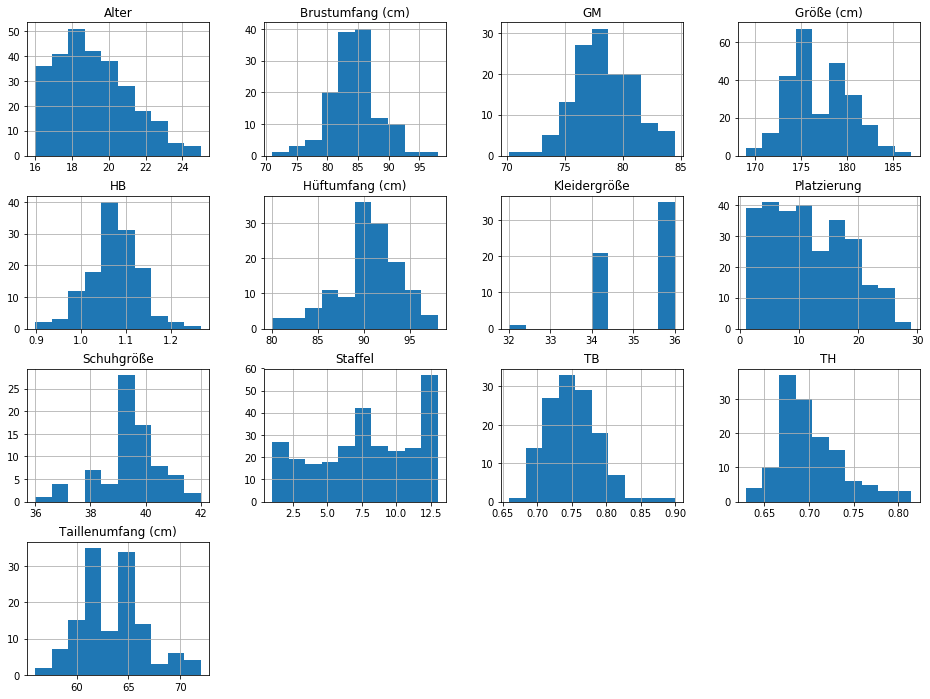

In [5]:
# Basishistogramme
data.hist(figsize=(16,12), bins=10);

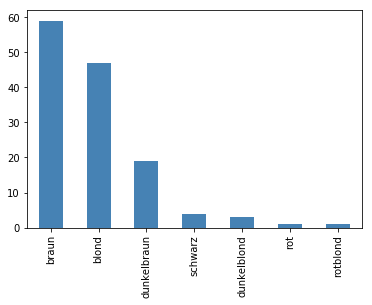

In [54]:
# Nominale Attribute plotten
data['Haarfarbe'].value_counts().plot.bar(color='steelblue');

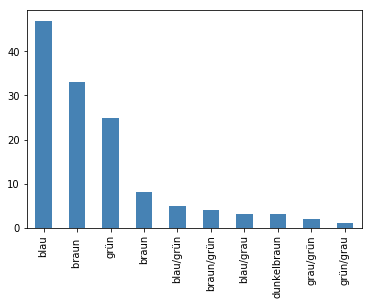

In [55]:
data['Augenfarbe'].value_counts().plot.bar(color='steelblue');

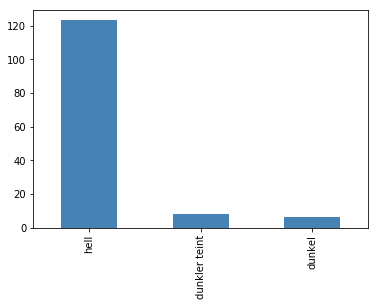

In [56]:
data['Hautfarbe'].value_counts().plot.bar(color='steelblue');

# Lebenszeit berechnen und NANs entfernen

In [6]:
# Berechne Lebenszeit
episoden = data.groupby('Staffel').count()['Platzierung'][data['Staffel']]
episoden.index = data.index
data['Lebenszeit'] = episoden - data['Platzierung'] + 1

In [7]:
# Existing Values
len(data)-data.isnull().sum()

Staffel               277
Teilnehmerin          277
Platzierung           276
Alter                 277
Größe (cm)            251
Haarfarbe             134
Augenfarbe            131
Hautfarbe             137
Brustumfang (cm)      132
Taillenumfang (cm)    132
Hüftumfang (cm)       132
Kleidergröße           57
Schuhgröße             77
HB                    132
TB                    132
TH                    132
GM                    132
Lebenszeit            276
dtype: int64

In [38]:
# Daten bereinigen:
data_clean = data[[#'Staffel',
                   'Teilnehmerin',
                   'Alter', 
                   'Größe (cm)', 
                   #'Haarfarbe', 
                   #'Augenfarbe', 
                   #'Hautfarbe',
                   'Brustumfang (cm)', 
                   'Taillenumfang (cm)', 
                   'Hüftumfang (cm)', 
                   'HB', 
                   'TB', 
                   'TH', 
                   'GM', 
                   #'Platzierung', 
                   'Lebenszeit']]
print('Voller Datensatz {}'.format(data_clean.shape))
print('Bereinigter Datensatz {}'.format(data_clean.dropna().shape))
data_clean = data_clean.dropna()
data_clean.index = range(len(data_clean))

Voller Datensatz (277, 11)
Bereinigter Datensatz (132, 11)


# Kategorielle Attribute bearbeiten

In [25]:
# Liste kategorieller Attribute
to_split = ['Haarfarbe','Augenfarbe', 'Hautfarbe']

# Kategorielle Attribute als Index-Attribute hinzufügen
for s in to_split:
    # Erzeuge Dataframe mit one-hot-encoded Spalten
    split = pd.get_dummies(data[s])
    # Neue Spaltennamen: 'column_name = category'
    column_names = ["%s=%s"%(s,x) for x in split.columns]
    # Neue Spaltennamen den Spalten zuordnen
    split.columns = column_names
    # Neue Spalten dem ursprünglichen Dataframe hinzufügen
    data_clean[column_names] = split

# Originalattribute löschen
for s in to_split:
    data_clean.drop(s, axis=1, inplace=True)

data_clean.head()

KeyError: "['Haarfarbe'] not found in axis"

In [39]:
# Nur numerische Einträge verwenden
data_num = data_clean._get_numeric_data()

# Modell erstellen

In [40]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(data_num, duration_col='Lebenszeit')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 132 observations, 0 censored>
      duration col = 'Lebenszeit'
number of subjects = 132
  number of events = 132
    log-likelihood = -507.39
  time fit was run = 2019-03-12 16:00:29 UTC

---
                     coef                                          exp(coef)  se(coef)     z    p  -log2(p)  lower 0.95  upper 0.95
Alter               -0.01                                               0.99      0.04 -0.19 0.85      0.24       -0.09        0.07
Größe (cm)          -0.03                                               0.97      0.03 -0.91 0.36      1.46       -0.09        0.03
Brustumfang (cm)    -1.85                                               0.16      0.89 -2.09 0.04      4.77       -3.59       -0.12
Taillenumfang (cm)  -3.32                                               0.04      2.05 -1.62 0.11      3.25       -7.34        0.70
Hüftumfang (cm)     -0.08                                               0.93      1.16 -0.07 0.95      0.08    

In [41]:
unconditioned_sf = cph.predict_survival_function(data_num)
unconditioned_sf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131
event_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1.00,0.99,0.98,0.98,0.96,0.97,0.98,0.97,0.98,0.99,0.98,0.97,0.98,0.98,0.97,0.98,0.98,0.98,0.97,0.97,0.97,0.97,0.98,0.98,0.97,0.97,0.98,0.98,0.98,0.98,0.98,0.98,0.97,0.98,0.98,0.98,0.98,0.98,0.97,0.98,0.98,0.97,0.98,0.98,0.96,0.98,0.97,0.97,0.98,0.98,0.97,0.98,0.97,0.99,0.97,0.98,0.98,0.98,0.98,0.98,0.97,0.98,0.97,0.97,0.98,0.97,0.96,0.97,0.98,0.97,0.99,0.98,0.97,0.98,0.98,0.99,0.97,0.98,0.98,0.98,0.98,0.98,0.95,0.98,0.97,0.98,0.98,0.98,0.99,0.98,0.98,0.97,0.98,0.97,0.98,0.97,0.98,0.97,0.98,0.97,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.97,0.94,0.98,0.98,0.99,0.98,0.97,0.97,0.98,0.98,0.98,0.97,0.97,0.98,0.98,0.98,0.99,0.98,0.98,0.99,0.98,0.99,0.99,0.98,0.98,0.98
2.00,0.97,0.96,0.96,0.92,0.92,0.96,0.93,0.96,0.97,0.95,0.93,0.96,0.96,0.93,0.95,0.96,0.96,0.93,0.92,0.93,0.93,0.96,0.94,0.93,0.94,0.95,0.96,0.95,0.95,0.95,0.95,0.94,0.96,0.95,0.96,0.96,0.96,0.93,0.96,0.95,0.93,0.95,0.95,0.92,0.96,0.94,0.94,0.94,0.95,0.93,0.95,0.94,0.98,0.94,0.96,0.96,0.95,0.95,0.96,0.93,0.95,0.94,0.93,0.95,0.93,0.92,0.94,0.95,0.93,0.98,0.96,0.94,0.96,0.95,0.99,0.94,0.94,0.94,0.95,0.96,0.95,0.88,0.95,0.94,0.95,0.95,0.95,0.97,0.96,0.95,0.93,0.94,0.93,0.95,0.93,0.95,0.94,0.94,0.93,0.96,0.98,0.96,0.95,0.96,0.95,0.95,0.92,0.87,0.95,0.94,0.97,0.96,0.93,0.93,0.95,0.95,0.95,0.94,0.93,0.95,0.96,0.94,0.97,0.96,0.96,0.99,0.96,0.97,0.97,0.95,0.95,0.94
3.00,0.93,0.92,0.91,0.83,0.84,0.91,0.86,0.92,0.93,0.89,0.86,0.91,0.92,0.86,0.89,0.92,0.91,0.85,0.84,0.86,0.86,0.91,0.88,0.85,0.87,0.89,0.91,0.89,0.89,0.90,0.89,0.88,0.91,0.89,0.91,0.91,0.91,0.85,0.91,0.90,0.86,0.90,0.89,0.83,0.92,0.87,0.87,0.88,0.89,0.85,0.90,0.86,0.96,0.87,0.92,0.91,0.90,0.89,0.91,0.86,0.88,0.87,0.85,0.90,0.86,0.83,0.87,0.90,0.86,0.96,0.91,0.88,0.91,0.90,0.97,0.87,0.88,0.88,0.89,0.92,0.90,0.75,0.89,0.87,0.89,0.89,0.89,0.94,0.92,0.89,0.85,0.88,0.86,0.89,0.86,0.90,0.87,0.88,0.85,0.91,0.95,0.92,0.89,0.91,0.90,0.89,0.84,0.74,0.88,0.88,0.94,0.92,0.86,0.85,0.89,0.90,0.90,0.87,0.84,0.89,0.91,0.88,0.95,0.92,0.92,0.97,0.91,0.94,0.93,0.89,0.90,0.88
4.00,0.89,0.89,0.88,0.77,0.77,0.87,0.81,0.89,0.90,0.84,0.81,0.87,0.89,0.81,0.84,0.88,0.88,0.79,0.78,0.80,0.80,0.87,0.83,0.79,0.82,0.84,0.87,0.85,0.85,0.86,0.85,0.83,0.87,0.85,0.87,0.88,0.87,0.80,0.88,0.85,0.80,0.86,0.85,0.76,0.89,0.82,0.81,0.83,0.84,0.79,0.86,0.81,0.94,0.82,0.88,0.87,0.86,0.85,0.87,0.80,0.84,0.82,0.80,0.86,0.81,0.77,0.82,0.86,0.81,0.95,0.87,0.83,0.87,0.86,0.96,0.82,0.83,0.83,0.85,0.88,0.86,0.66,0.84,0.82,0.84,0.85,0.84,0.92,0.88,0.85,0.80,0.83,0.81,0.85,0.81,0.86,0.81,0.83,0.79,0.87,0.93,0.88,0.85,0.87,0.85,0.84,0.78,0.65,0.84,0.83,0.92,0.88,0.81,0.79,0.85,0.86,0.85,0.82,0.78,0.85,0.87,0.83,0.92,0.89,0.89,0.96,0.87,0.92,0.90,0.84,0.86,0.83


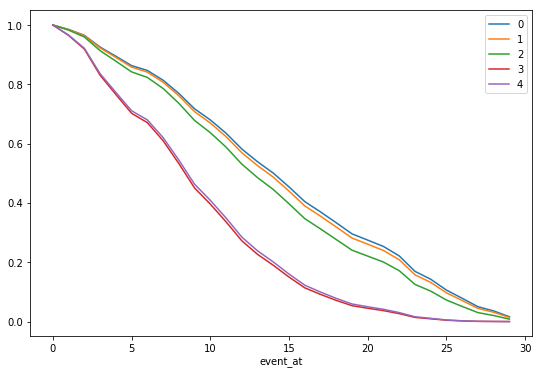

In [51]:
subjects = [0, 1, 2, 3, 4]
unconditioned_sf[subjects].plot(figsize=(9,6));
plt.legend()

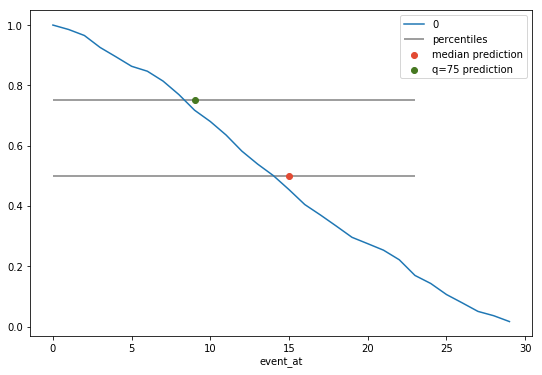

In [57]:
from lifelines.utils import median_survival_times, qth_survival_times
subject=0

predictions_50 = median_survival_times(unconditioned_sf)
predictions_75 = qth_survival_times(0.75, unconditioned_sf)

unconditioned_sf[subject].plot(figsize=(9,6));

plt.hlines([0.5, 0.75], 0, 23, alpha=0.5, label="percentiles")

plt.scatter(median_survival_times(unconditioned_sf[subject]), 0.5,  color="#E24A33", label="median prediction", zorder=20)
plt.scatter(qth_survival_times(0.75, unconditioned_sf[subject]), 0.75,  color="#467821", label="q=75 prediction", zorder=20)

plt.legend()